In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import copy
import matplotlib.pyplot as plt
plt.rc('font', size=18)

In [2]:
# Считывание данных
# Предполагается, что в файле 'data.txt' в каждой строке через пробел записаны x и y
filename = '100CH3OH-CG.rdf'
data = np.loadtxt(filename)
x = data[:, 0]
y = data[:, 1]

Text(0, 0.5, 'RDF(r)')

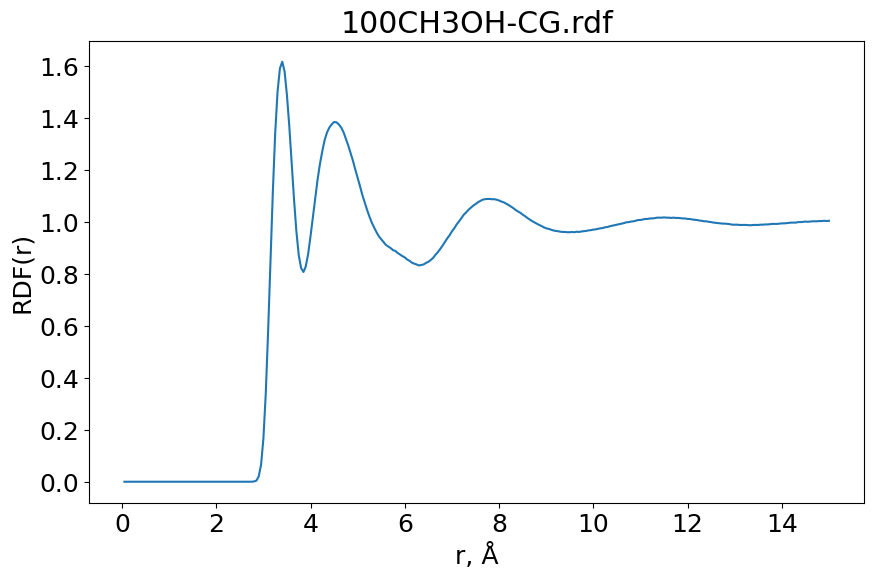

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(filename)
plt.xlabel("r, Å")
plt.ylabel("RDF(r)")


In [4]:
# Аппроксимация сплайном
cs = CubicSpline(x, y)

# Визуализация
x_new = np.linspace(x.min(), x.max(), 1000)  # Генерируем новые точки для гладкой кривой
y_new = cs(x_new)  # Вычисляем значения сплайна в новых точках

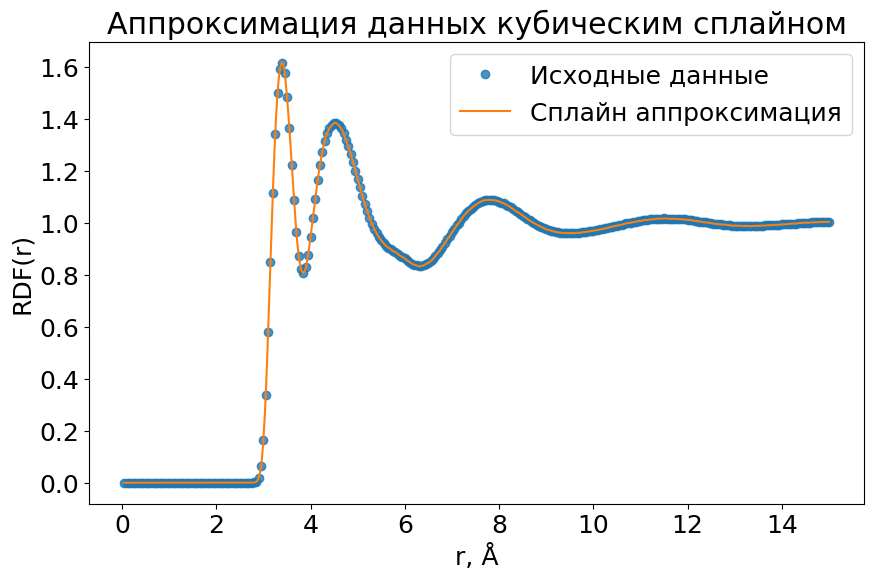

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Исходные данные', alpha=0.8)
plt.plot(x_new, y_new, '-', label='Сплайн аппроксимация')
plt.legend()
plt.xlabel("r, Å")
plt.ylabel("RDF(r)")
plt.title('Аппроксимация данных кубическим сплайном')
plt.show()

In [35]:
def compute_loss(data_y, approx, l1, l2, n):
    x_new = np.linspace(l1, l2, n)  # Генерируем новые точки для гладкой кривой
    y_new = np.array(approx(x_new))

    return np.sum(np.power(data_y - y_new, 2))
    

def optimization(x, y):
    temp_x = copy.deepcopy(x)
    temp_y = copy.deepcopy(y)
    l1 = min(x)
    l2 = max(x)
    n = len(x)

    # Массив для отслеживания индексов оставшихся точек
    indexes = list(range(n))

    importance_array = []

    for _ in range(n-2):
        temp_losses = []
        for j in range(len(temp_x)-2):
            temp_x_ = np.delete(temp_x, j)
            temp_y_ = np.delete(temp_y, j)

            temp_approx_ = CubicSpline(temp_x_, temp_y_)
            temp_loss_ = compute_loss(y, temp_approx_, l1, l2, n)

            temp_losses.append(temp_loss_)

        worst_index = np.argmin(temp_losses)  # Индекс точки с минимальной потерей
        importance_array.append(indexes.pop(worst_index))  # Сохраняем и удаляем "наименее важную" точку
        temp_x = np.delete(temp_x, worst_index)
        temp_y = np.delete(temp_y, worst_index)

    return importance_array


def plot_for_n_points(n, importance, x, y):
    top = importance[-n-1:-1]
    top = sorted(top)
    plt.figure(figsize=(10,6))
    plt.plot(x, y)
    plt.scatter(x[top], y[top], color="lime")
    plt.xlabel("r, Å")
    plt.ylabel("RDF(r)")
    plt.title(f"{n} самых важных точек")
    cs = CubicSpline(x[top], y[top])
    loss = compute_loss(y, cs, x.min(), x.max(), len(x))
    # print(f"Loss: {loss}")
    plt.text(8, 0, f"Loss: {loss}")
    plt.show()



def loss_n_points(importance_result, x, y):
    losses = []
    for i in range(2, len(importance_result)-5):
        top = importance_result[-i-1:-1]
        top = sorted(top)
        cs = CubicSpline(x[top], y[top])
        loss = compute_loss(y, cs, x.min(), x.max(), len(x))
        losses.append(loss)

    return losses


def best_n_points(n, importance, x, y):
    top = importance[-n-1:-1]
    top = sorted(top)
    print(x[top])
    print(y[top])



In [7]:
importance_result = optimization(x,y)

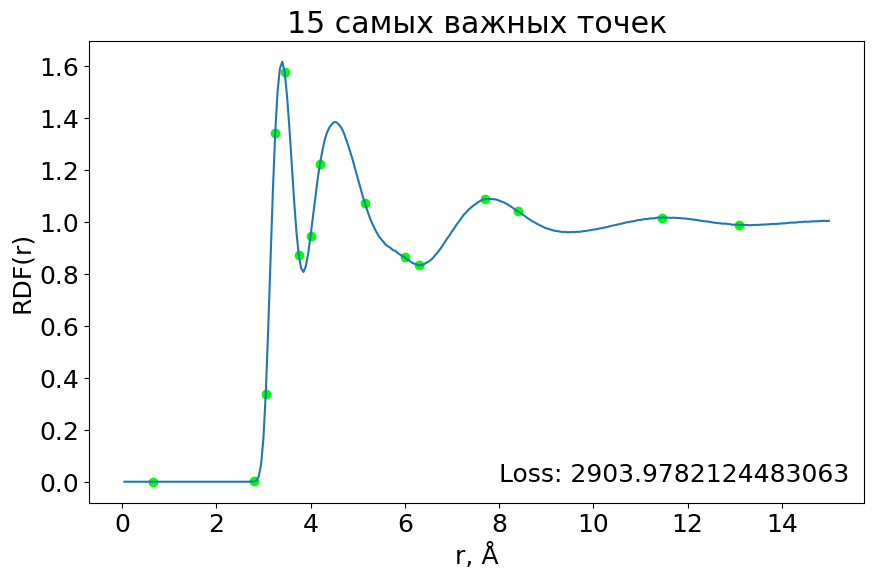

In [32]:
plot_for_n_points(15, importance_result, x, y)

In [10]:
losses_array = loss_n_points(importance_result, x, y)

Text(0, 0.5, 'LOG_10(loss)')

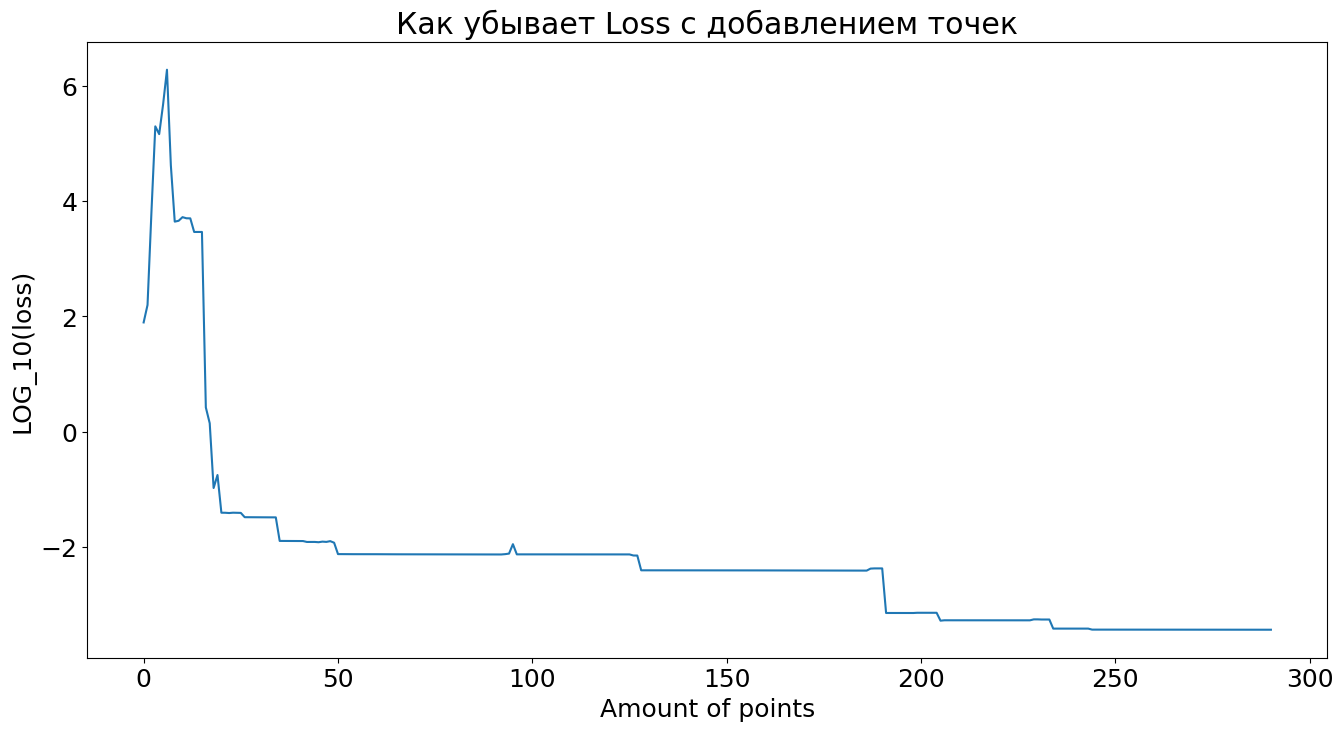

In [11]:
plt.figure(figsize=(16,8))
plt.plot(np.log10(np.array(losses_array)))
plt.title("Как убывает Loss с добавлением точек")
plt.xlabel("Amount of points")
plt.ylabel("LOG_10(loss)")


In [12]:
losses_array

[78.39065550059173,
 157.41055818806535,
 6273.613978247305,
 197028.23306857923,
 144329.5675319268,
 470008.0341331537,
 1889505.390611254,
 41561.22486490878,
 4387.750055573098,
 4537.93635701399,
 5246.201394078909,
 5017.514503761184,
 4998.119644914439,
 2903.9782124483063,
 2904.7685200132128,
 2904.907922409085,
 2.631294051313999,
 1.3985522976532807,
 0.10541024850084313,
 0.1772116340830434,
 0.039340715096252726,
 0.03925057850066293,
 0.03884432125383446,
 0.03935073392445763,
 0.039161341055896845,
 0.03904287923609721,
 0.032885341855560184,
 0.03283251929585984,
 0.03276822421630014,
 0.03275585403032308,
 0.032712025972299025,
 0.032730319129956484,
 0.03270164606473822,
 0.032685211699090194,
 0.03265396935838605,
 0.012749761652159304,
 0.012748845297986498,
 0.012715519584511056,
 0.012720863875335019,
 0.012705686377223033,
 0.012707487070661858,
 0.01268856632659425,
 0.012235250331211265,
 0.012249867105136834,
 0.012248287984815967,
 0.01210688140844676,
 0.012

Text(0, 0.5, 'Number')

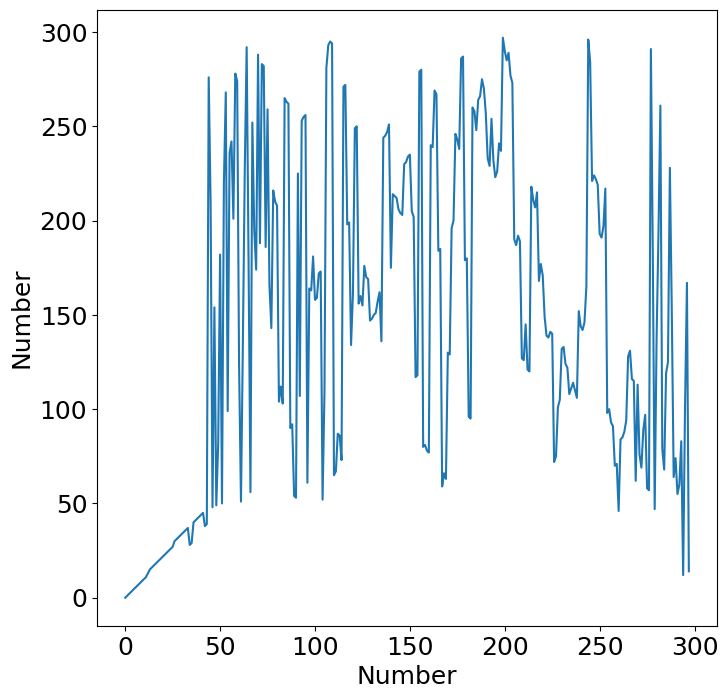

In [22]:
plt.figure(figsize=(8, 8))
plt.plot(importance_result)
plt.xlabel("Number")
plt.ylabel("Number")

In [37]:
best_n_points(15, importance_result, x, y)

[ 0.65  2.8   3.05  3.25  3.45  3.75  4.    4.2   5.15  6.    6.3   7.7
  8.4  11.45 13.1 ]
[0.000e+00 1.000e-03 3.390e-01 1.340e+00 1.578e+00 8.720e-01 9.450e-01
 1.223e+00 1.074e+00 8.630e-01 8.320e-01 1.087e+00 1.040e+00 1.016e+00
 9.880e-01]
